In [1]:
import os
os.environ["PATH"] += os.pathsep + 'E:\\Anaconda3\\Library\\bin\\graphviz'

thisFilePath=os.path.abspath('.')
os.chdir(thisFilePath)
os.getcwd()


'C:\\Users\\Administrator\\Desktop\\python课程\\myFolder20181127'

In [7]:
import pandas as pd
mydata = pd.read_csv('DataForClassify.csv',encoding="gb2312",usecols = ['yuwen','lishi','zhengzhi','shuxue','wuli','huaxue'])

train_x=mydata.iloc[:,1:7].values
train_y=mydata.iloc[:,-1].values

In [8]:
train_y[:5]

array([51, 81, 80, 80, 75], dtype=int64)

In [13]:
import numpy as np
train_x_mean=np.mean(train_x,axis=0)
train_x_meanDrop=train_x-train_x_mean
train_x_cov=np.cov(train_x_meanDrop,rowvar=0)
train_x_cov

array([[ 85.75545455,  58.78353535, -53.07444444, -54.97636364,
        -59.09090909],
       [ 58.78353535,  99.64959596, -61.52232323, -60.28060606,
        -64.49494949],
       [-53.07444444, -61.52232323, 108.52636364,  65.37353535,
         76.50505051],
       [-54.97636364, -60.28060606,  65.37353535, 107.99636364,
         70.70707071],
       [-59.09090909, -64.49494949,  76.50505051,  70.70707071,
        116.56565657]])

In [14]:
mydata = pd.read_csv('DataForClassify.csv',encoding="gb2312",usecols=['yuwen','lishi','zhengzhi','shuxue','wuli','huaxue'])
R=mydata.corr()
R

,yuwen,lishi,zhengzhi,shuxue,wuli,huaxue
yuwen,1.000000,0.697769,0.740321,-0.529724,-0.543280,-0.576379
lishi,0.697769,1.000000,0.635897,-0.550157,-0.571269,-0.591023
zhengzhi,0.740321,0.635897,1.000000,-0.591599,-0.581079,-0.598415
shuxue,-0.529724,-0.550157,-0.591599,1.000000,0.603851,0.680201
wuli,-0.543280,-0.571269,-0.581079,0.603851,1.000000,0.630192
huaxue,-0.576379,-0.591023,-0.598415,0.680201,0.630192,1.000000


In [15]:
eig_value,eig_vector=np.linalg.eig(train_x_cov)
eig=pd.DataFrame()
eig['eig_value']=eig_value
eig


,eig_value
0,355.653835
1,49.825193
2,32.536068
3,36.648178
4,43.830160


In [17]:
eig.sort_values('eig_value',ascending=False,inplace=True)

In [20]:

eigSum=list()

for m in range(1,len(eig)+1):
               print("第"+str(m)+"个主成分累计贡献率："+str(eig['eig_value'][:m].sum()/eig['eig_value'].sum()))

第1个主成分累计贡献率：0.6859370081241755
第2个主成分累计贡献率：0.7820331005233101
第3个主成分累计贡献率：0.8665667844998503
第4个主成分累计贡献率：0.9372488330168346
第5个主成分累计贡献率：1.0


In [21]:
np.argsort(eig)

,eig_value
0,0
1,0
4,0
3,0
2,0


In [22]:
eigSortIndex=np.argsort(eig_value)
eigSortIndex

array([2, 3, 4, 1, 0], dtype=int64)

In [23]:
eigVectors2=pd.DataFrame(eig_vector[:,eigSortIndex])
eigVectors2


,0,1,2,3,4
0,0.683661,-0.333417,0.075548,0.516647,0.385758
1,-0.562637,0.308197,0.243537,0.585727,0.431355
2,-0.332461,-0.569612,-0.358755,0.470759,-0.463349
3,0.033937,-0.139373,0.876061,0.076058,-0.454043
4,0.323055,0.670794,-0.196961,0.403238,-0.494243


In [31]:
train_x_meanDrop_Dimensionality=np.mat(train_x_meanDrop)*np.mat(eigVectors2)
train_x_meanDrop_Dimensionality[0:5]
train_y[:5]

array([51, 81, 80, 80, 75], dtype=int64)

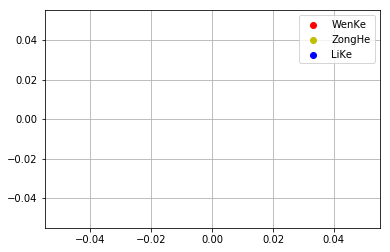

In [32]:
import matplotlib.pyplot as plt
myLegend=['WenKe','ZongHe','LiKe']
train_x_meanDrop_Dimensionality=np.mat(train_x_meanDrop_Dimensionality)
# for c,i,legend in zip('ryb',[1,2,3],legend):
#     plt.scatter(train_x_meanDrop_Dimensionality[train_y==i,0].tolist(),train_x_meanDrop_Dimensionality[train_y==i,1].tolist(),c=c,lable=legend)
for c ,i , myLegend in zip('ryb', [1, 2, 3], myLegend):
    plt.scatter(train_x_meanDrop_Dimensionality[train_y == i,0].tolist(),train_x_meanDrop_Dimensionality[train_y == i,1].tolist(), c=c, label=myLegend)
    
plt.grid()
plt.legend()
plt.show()